In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_directory='input/train'
test_directory='input/test'
val_directory='input/valid'

In [3]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

80134624/80134624 [==============================] - 31s 0us/step


In [4]:
folders = glob('input/train/*')
len(folders)

45

In [5]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [6]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
model.compile( 
  loss='categorical_crossentropy',
  optimizer='adam', # For update the weight
  metrics=['accuracy']
)

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7285 images belonging to 45 classes.
Found 225 images belonging to 45 classes.


In [9]:
print(len(training_set))
print(len(test_set))

228
8


In [10]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
228/228 [==============================] - 98s 371ms/step - loss: 2.2331 - accuracy: 0.4863 - val_loss: 0.7144 - val_accuracy: 0.7867
Epoch 2/5
228/228 [==============================] - 72s 315ms/step - loss: 0.9019 - accuracy: 0.7520 - val_loss: 0.6523 - val_accuracy: 0.8267
Epoch 3/5
228/228 [==============================] - 70s 308ms/step - loss: 0.6106 - accuracy: 0.8228 - val_loss: 0.5007 - val_accuracy: 0.8667
Epoch 4/5
228/228 [==============================] - 71s 311ms/step - loss: 0.4979 - accuracy: 0.8597 - val_loss: 0.5045 - val_accuracy: 0.8533
Epoch 5/5
228/228 [==============================] - 71s 309ms/step - loss: 0.3946 - accuracy: 0.8873 - val_loss: 0.5290 - val_accuracy: 0.8622


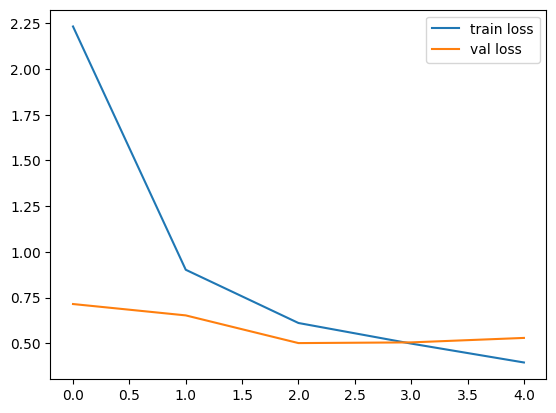

In [11]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

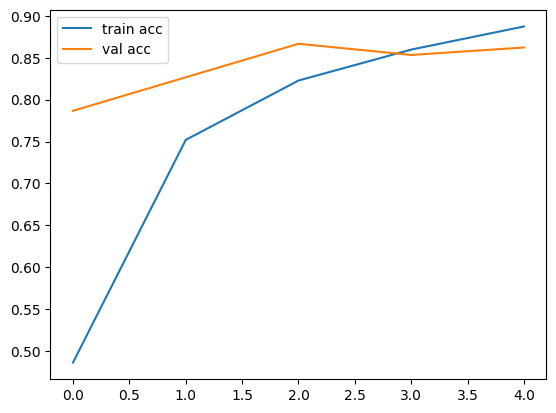

In [12]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [13]:
model.save('D:\CUET\L3_T2\CSE-300_SDP\Bird_classification/vgg19.h5')